In [179]:
import matplotlib.pyplot as plt
import scikitplot as skplt
import pandas as pd
import seaborn as sns
import warnings

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_auc_score, recall_score, precision_score
from sklearn.model_selection import train_test_split

from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

warnings.filterwarnings('ignore')

In [180]:
# Membaca dan menyimpan dataset train
df = pd.read_csv('../Dataset/kendaraan_train_clean.csv')
df.sample(5)

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
192909,1.0,0.246154,1.0,0.038462,1.0,0.0,0.0,0.052640,0.932099,0.280277,0
191362,1.0,0.046154,1.0,0.403846,0.0,0.0,0.0,0.053663,0.932099,0.332180,0
256227,0.0,0.030769,1.0,0.057692,1.0,1.0,0.0,0.034357,0.932099,0.294118,0
269566,1.0,0.046154,1.0,0.423077,1.0,0.0,0.0,0.045052,0.932099,0.404844,0
84151,0.0,0.676923,1.0,0.634615,0.0,1.0,1.0,0.047653,0.154321,0.352941,0


In [181]:
# Membaca dan menyimpan dataset test
df_test = pd.read_csv('../Dataset/kendaraan_test_clean.csv')
df_test.sample(5)

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
17374,0,0.215385,1,0.038462,0,1,1,0.000000,0.962963,0.069204,1
37946,0,0.046154,1,0.576923,1,0,1,0.043785,0.932099,0.384083,0
14590,0,0.030769,1,0.057692,0,0,1,0.038470,0.981481,0.664360,0
13836,1,0.030769,1,0.192308,1,0,0,0.000000,0.932099,0.342561,0
46000,0,0.753846,1,0.057692,1,1,0,0.034584,0.104938,0.107266,0


0    250661
1     35001
Name: Tertarik, dtype: int64


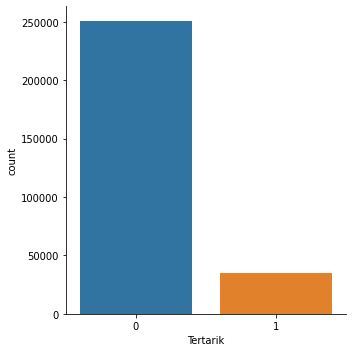

In [182]:
# Mengecek keseimbangan target variable
print(df['Tertarik'].value_counts())
sns.catplot(x='Tertarik', data=df, kind='count')

In [183]:
# Memisahkan antara feature dan target variable
x_train = df.drop("Tertarik", axis=1)
y_train = df["Tertarik"]

## **Tuning Model**

In [184]:
# Mendefinisikan array untuk kumpulan algoritma machine learning yang akan digunakan
classifier = [
    DecisionTreeClassifier(class_weight='balanced'),
    SGDClassifier(class_weight='balanced', loss="modified_huber"),
    GaussianNB(),
    AdaBoostClassifier(),
    RandomForestClassifier(class_weight='balanced'),
]

name = [
    'Decision Tree',
    'SGDClassifier',
    'Naive Bayes',
    'AdaBoost',
    'Random Forest',
]

### **Melatih Model Machine Learning**

In [185]:
# Melakukan pelatihan terhadap model yang telah didefinisikan sebelumnya
for models in classifier:
    models.fit(x_train, y_train)

In [186]:
# Mendefinisikan fungsi untuk evaluasi metrik untuk setiap model yang terdiri atas
# Confusion Matrix, ROC Curve, F1 Score, Precision, Recall, Dan Accuracy

def report(model, title, x_test, y_test):
    result = model.predict(x_test)
    conf_matrix = confusion_matrix(y_test, result)

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

    sns.heatmap(conf_matrix, annot=True, xticklabels=[0, 1], yticklabels=[0, 1], cmap='flare', fmt='d', ax=axes[0])
    skplt.metrics.plot_roc(y_test, model.predict_proba(x_test), ax=axes[1])

    axes[0].set_ylabel('Actual')
    axes[0].set_xlabel('Predicted')
    axes[0].set_title(f'Confusion matrix {title}', pad=16)

    plt.show()

    f1 = round(f1_score(y_test, result), 3)
    recall = round(recall_score(y_test, result), 3)
    precision = round(precision_score(y_test, result), 3)
    roc = round(roc_auc_score(y_test, result), 3)
    accuracy = round(accuracy_score(y_test, result), 3)

    print("F1-Score \t:", f1)
    print("Recall \t\t:", recall)
    print("Precision \t:", precision)
    print("ROC-AUC \t:", roc)
    print("Accuracy \t:", accuracy, end="\n\n")

    return title, f1, recall, precision, roc, accuracy

## **Memprediksi Dan Evaluasi Data Test**

In [187]:
# Mendefinisikan fungsi untuk evaluasi metrik untuk setiap model yang terdiri atas
# Confusion Matrix, ROC Curve, F1 Score, Precision, Recall, Dan Accuracy

def report(model, title, x_test, y_test):
    result = model.predict(x_test)
    conf_matrix = confusion_matrix(y_test, result)

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

    sns.heatmap(conf_matrix, annot=True, xticklabels=[0, 1], yticklabels=[
                0, 1], cmap='flare', fmt='d', ax=axes[0])
    skplt.metrics.plot_roc(y_test, model.predict_proba(x_test), ax=axes[1])

    axes[0].set_ylabel('Actual')
    axes[0].set_xlabel('Predicted')
    axes[0].set_title(f'Confusion matrix {title}', pad=16)

    plt.show()

    f1 = round(f1_score(y_test, result, average='weighted'), 3)
    recall = round(recall_score(y_test, result), 3)
    precision = round(precision_score(y_test, result), 3)
    roc = round(roc_auc_score(y_test, result), 3)
    accuracy = round(accuracy_score(y_test, result), 3)

    print("F1-Score \t:", f1)
    print("Recall \t\t:", recall)
    print("Precision \t:", precision)
    print("ROC-AUC \t:", roc)
    print("Accuracy \t:", accuracy, end="\n\n")

    return title, f1, recall, precision, roc, accuracy


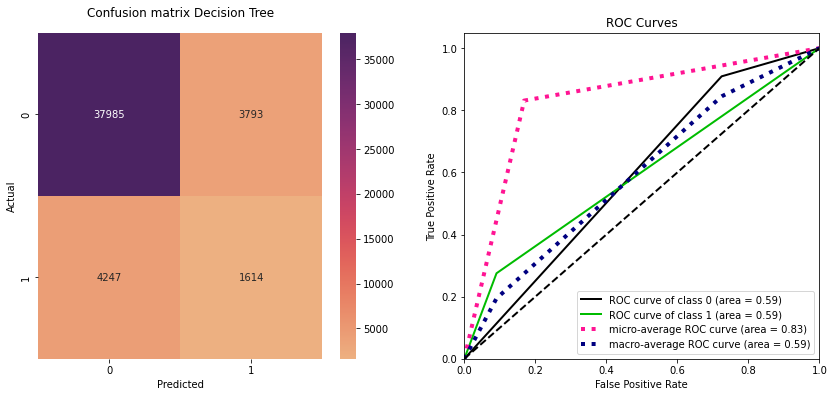

F1-Score 	: 0.828
Recall 		: 0.275
Precision 	: 0.299
ROC-AUC 	: 0.592
Accuracy 	: 0.831



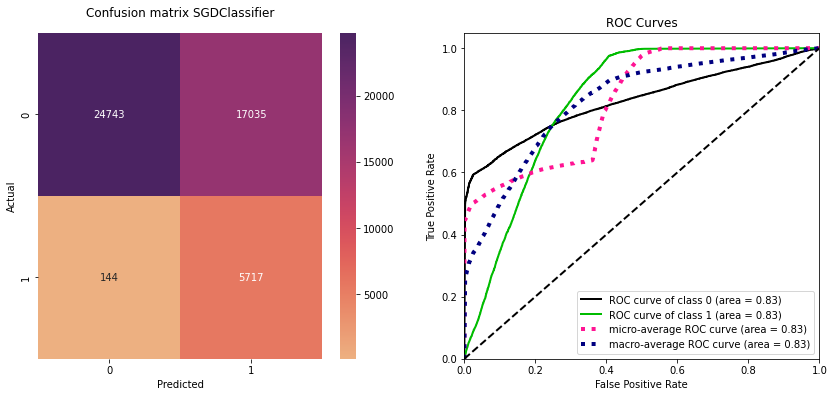

F1-Score 	: 0.7
Recall 		: 0.975
Precision 	: 0.251
ROC-AUC 	: 0.784
Accuracy 	: 0.639



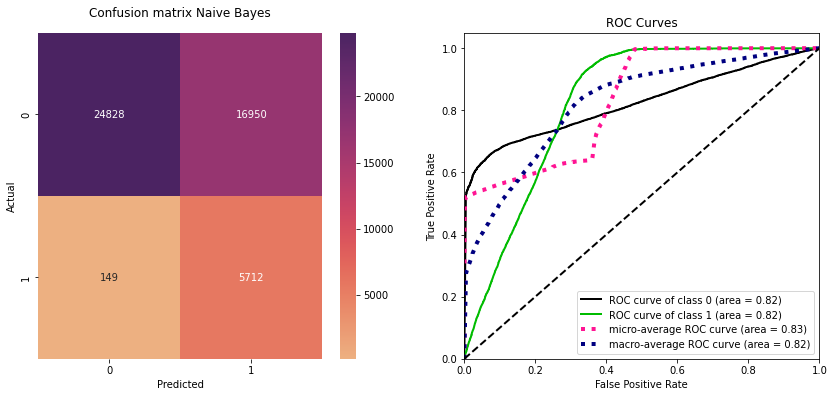

F1-Score 	: 0.702
Recall 		: 0.975
Precision 	: 0.252
ROC-AUC 	: 0.784
Accuracy 	: 0.641



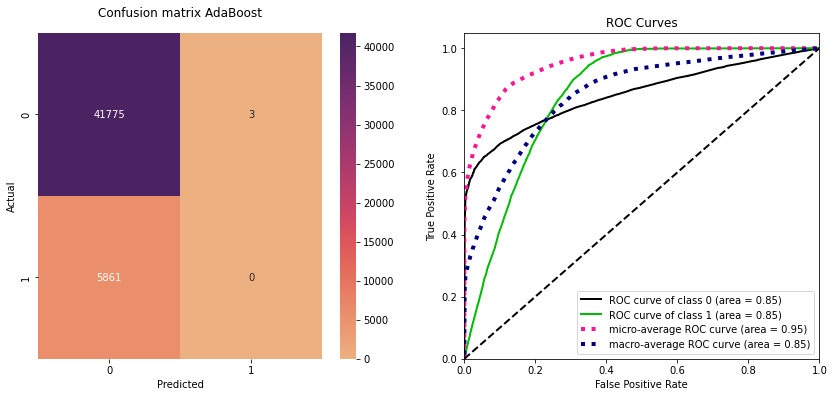

F1-Score 	: 0.819
Recall 		: 0.0
Precision 	: 0.0
ROC-AUC 	: 0.5
Accuracy 	: 0.877



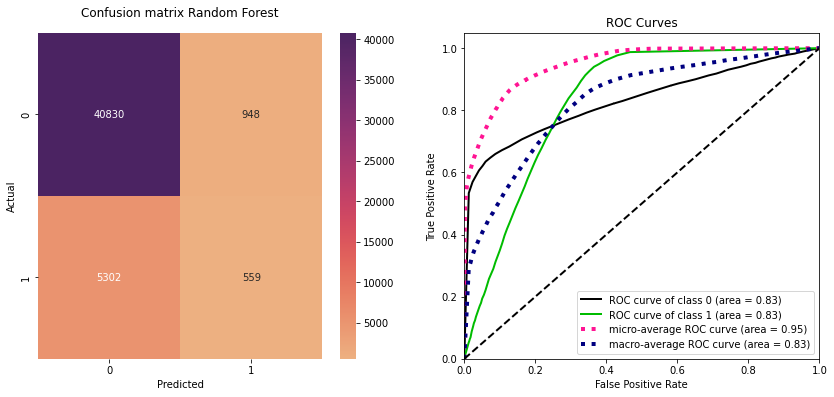

F1-Score 	: 0.833
Recall 		: 0.095
Precision 	: 0.371
ROC-AUC 	: 0.536
Accuracy 	: 0.869



In [188]:
# Memisahkan antara feature dan target variable untuk data test
x_test = df_test.drop("Tertarik", axis=1)
y_test = df_test["Tertarik"]

# Melakukan perulangan untuk menampilkan hasil evaluasi data test setiap model
metrics_report_test = []

for models, i in zip(classifier, name):
    title, f1, recall, precision, roc, accuracy = report(models, i, x_test, y_test)
    metrics_report_test.append([title, f1, recall, precision, roc, accuracy])


### **Jika Menginginkan Prediksi Seimbang Antara True Positive dan True Negative**

In [189]:
metrics_report_test = pd.DataFrame(metrics_report_test, columns=['Model', 'F1-Score', 'Recall', 'Precision', 'ROC-AUC', 'Accuracy'])
metrics_report_test.sort_values(by=['ROC-AUC'], ascending=False)


,Model,F1-Score,Recall,Precision,ROC-AUC,Accuracy
1,SGDClassifier,0.700,0.975,0.251,0.784,0.639
2,Naive Bayes,0.702,0.975,0.252,0.784,0.641
0,Decision Tree,0.828,0.275,0.299,0.592,0.831
4,Random Forest,0.833,0.095,0.371,0.536,0.869
3,AdaBoost,0.819,0.000,0.000,0.500,0.877


### **Jika Lebih Menginginkan Prediksi True Postive**

In [190]:
metrics_report_test = pd.DataFrame(metrics_report_test, columns=['Model', 'F1-Score', 'Recall', 'Precision', 'ROC-AUC', 'Accuracy'])
metrics_report_test.sort_values(by=['Recall'], ascending=False)

,Model,F1-Score,Recall,Precision,ROC-AUC,Accuracy
1,SGDClassifier,0.700,0.975,0.251,0.784,0.639
2,Naive Bayes,0.702,0.975,0.252,0.784,0.641
0,Decision Tree,0.828,0.275,0.299,0.592,0.831
4,Random Forest,0.833,0.095,0.371,0.536,0.869
3,AdaBoost,0.819,0.000,0.000,0.500,0.877
